<a href="https://colab.research.google.com/github/FrancoPalavicinoG/cellia/blob/main/notebooks/03_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load DF from Google Drive

Mount Drive

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load Dataframe

In [54]:
input_path = "/content/drive/MyDrive/cellia_drive/Datasets/"

df = pd.read_excel(input_path + "bio_dataset.xlsx")

In [55]:
print("Dataset shape:", df.shape)

Dataset shape: (5214, 27)


Dataset example

In [56]:
display(df.head(10))

,SEQN,GENDER,AGE_YEARS,AGE_MONTHS,BODY_MASS_INDEX,HEIGHT,WEIGHT,TOTAL_CHOL,CHOLESTEROL,CREATININE,...,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1,69,828,26.7,171.3,78.3,167,168.0,1.21,...,0,0,0,1,0,0,0,0,62,0
1,73558,1,54,648,28.6,176.8,89.5,170,167.0,0.79,...,0,0,0,0,0,0,0,0,0,0
2,73559,1,72,864,28.9,175.3,88.9,126,127.0,1.22,...,0,0,0,0,0,0,0,0,0,1
3,73561,0,73,876,19.7,162.4,52.0,201,207.0,0.73,...,0,0,0,0,0,0,0,0,0,1
4,73562,1,56,672,41.7,158.7,105.0,226,230.0,0.89,...,1,0,1,0,0,54,0,55,0,0
5,73564,0,61,732,35.7,161.8,93.4,168,167.0,0.92,...,0,0,0,0,0,0,0,0,0,0
6,73566,0,56,672,26.5,152.8,61.8,278,278.0,0.55,...,0,0,0,0,0,0,0,0,0,0
7,73567,1,65,780,22.0,172.4,65.3,173,170.0,0.97,...,0,0,0,0,0,0,0,0,0,1
8,73568,0,26,312,20.3,152.5,47.1,168,174.0,0.74,...,0,0,0,0,0,0,0,0,0,0
9,73571,1,76,912,34.4,172.5,102.4,167,157.0,1.19,...,0,0,1,0,0,0,0,72,0,0


### Heart condition indicator (HCI)

In [57]:
heart_condition_cols = [
    'HEART_FAILURE',
    'CORO_HEART_DISEASE',
    'ANGINA_PECTORIS',
    'HEART_ATTACK',
    'STROKE'
]

In [58]:
df['HEART_CONDITION'] = (df[heart_condition_cols].sum(axis=1) > 0).astype(int)

In [59]:
display(df.head(5))

,SEQN,GENDER,AGE_YEARS,AGE_MONTHS,BODY_MASS_INDEX,HEIGHT,WEIGHT,TOTAL_CHOL,CHOLESTEROL,CREATININE,...,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES,HEART_CONDITION
0,73557,1,69,828,26.7,171.3,78.3,167,168.0,1.21,...,0,0,1,0,0,0,0,62,0,1
1,73558,1,54,648,28.6,176.8,89.5,170,167.0,0.79,...,0,0,0,0,0,0,0,0,0,0
2,73559,1,72,864,28.9,175.3,88.9,126,127.0,1.22,...,0,0,0,0,0,0,0,0,1,0
3,73561,0,73,876,19.7,162.4,52.0,201,207.0,0.73,...,0,0,0,0,0,0,0,0,1,0
4,73562,1,56,672,41.7,158.7,105.0,226,230.0,0.89,...,0,1,0,0,54,0,55,0,0,1


Total count of patients by HCI

In [60]:
hci_counts = df['HEART_CONDITION'].value_counts()
print(hci_counts)

HEART_CONDITION
0    4701
1     513
Name: count, dtype: int64


Count of diseases within HCI

In [61]:
heart_counts = df.loc[df['HEART_CONDITION'] == 1, heart_condition_cols].sum()
print(heart_counts)

HEART_FAILURE         152
CORO_HEART_DISEASE    202
ANGINA_PECTORIS       121
HEART_ATTACK          198
STROKE                167
dtype: int64


Calculate relative proportions within HCI

In [62]:
heart_props = heart_counts / heart_counts.sum()

Heart Condition Distribution by Disease Type

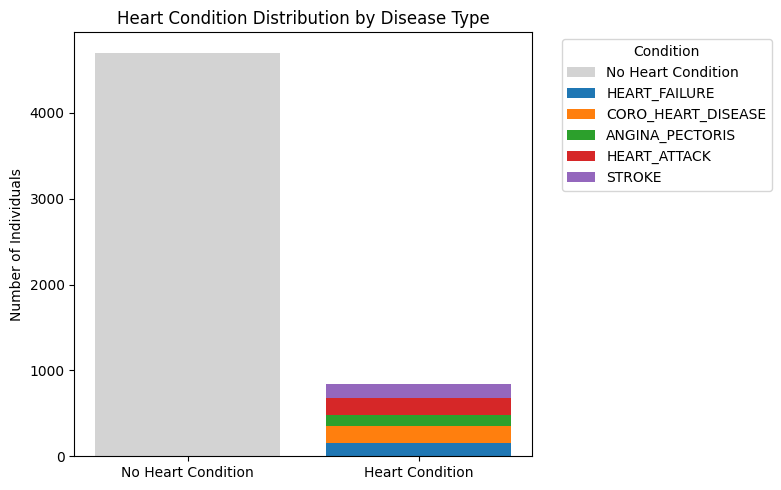

In [63]:
fig, ax = plt.subplots(figsize=(8, 5))

# Bar for HCI = 0 (no disease)
ax.bar('No Heart Condition', hci_counts.get(0, 0), color='lightgray', label='No Heart Condition')

# Bar for HCI = 1 (with disease), stacked with proportions by disease type
bottom = 0
for cond, value in heart_counts.items():
    ax.bar('Heart Condition', value, bottom=bottom, label=cond)
    bottom += value

ax.set_ylabel('Number of Individuals')
ax.set_title('Heart Condition Distribution by Disease Type')
ax.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Heart Condition Breakdown (HCI = 1)

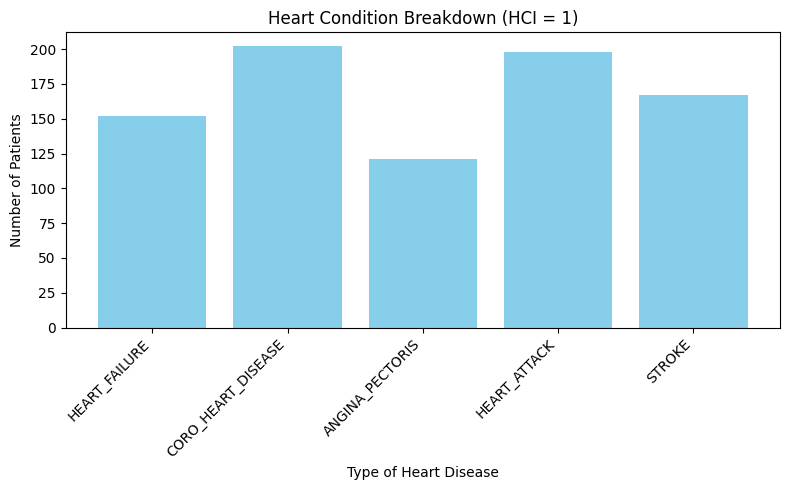

In [64]:
plt.figure(figsize=(8, 5))
plt.bar(heart_counts.index, heart_counts.values, color='skyblue')
plt.title("Heart Condition Breakdown (HCI = 1)")
plt.xlabel("Type of Heart Disease")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bubble Chart: Weight vs Height, Bubble Size = Total Cholesterol, Color = Heart Disease

In [65]:
def bubble_chart(df, x_col='WEIGHT', y_col='HEIGHT', size_col='TOTAL_CHOL', disease_cols=None, size_multiplier=0.5, figsize=(20, 12)):

    # Assign disease type per row
    def assign_disease(row):
        for col in disease_cols:
            if row[col] == 1:
                return col
        return 'Multiple'

    df_plot = df.copy()
    df_plot['disease_type'] = df_plot.apply(assign_disease, axis=1)

    # Colors by disease
    disease_colors = {
        'HEART_FAILURE': 'red',
        'CORO_HEART_DISEASE': 'blue',
        'ANGINA_PECTORIS': 'green',
        'HEART_ATTACK': 'orange',
        'STROKE': 'yellow',
        'Multiple': 'purple'
    }

    plt.figure(figsize=figsize)
    for disease, color in disease_colors.items():
        subset = df_plot[df_plot['disease_type'] == disease]
        plt.scatter(
            subset[x_col],
            subset[y_col],
            s=subset[size_col] * size_multiplier,
            c=color,
            alpha=0.6,
            label=disease
        )

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Bubble Chart: {x_col} vs {y_col}, Bubble Size = {size_col}, Color = Heart Disease')
    plt.legend(title='Heart Disease Type')
    plt.grid(True, alpha=0.3)
    plt.show()

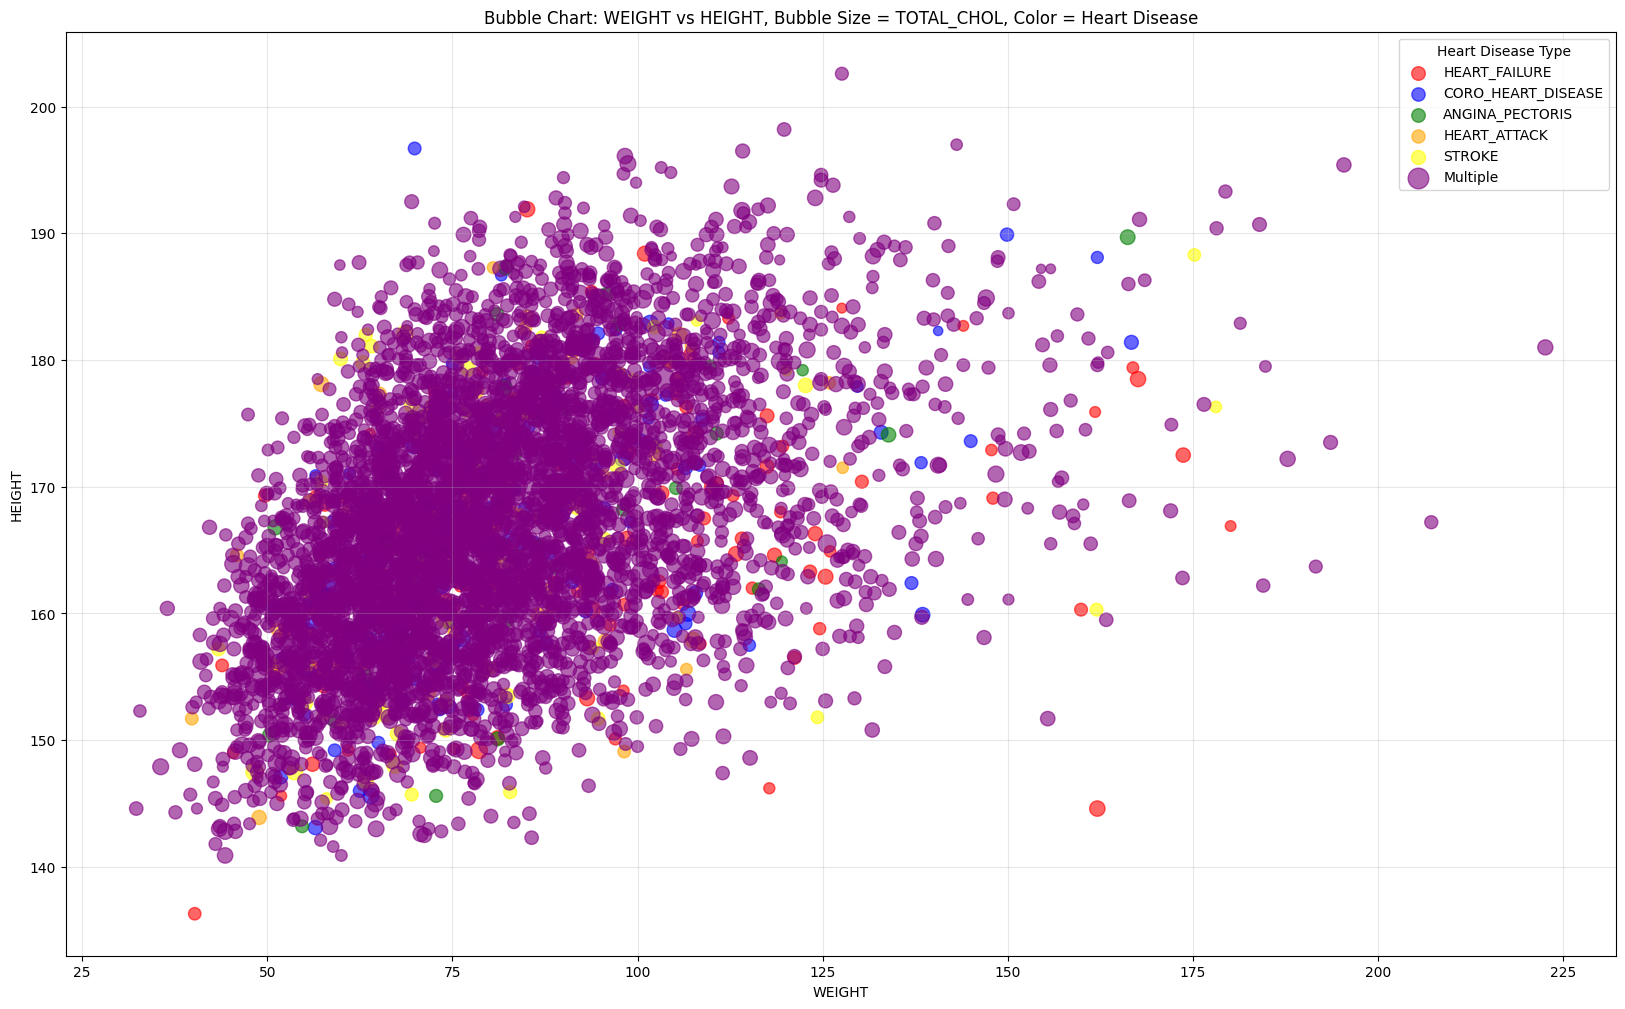

In [66]:
bubble_chart(df, size_col='TOTAL_CHOL', disease_cols=heart_condition_cols)

Bubble Chart: Weight vs Height, Bubble Size = LDL_HDL_ratio, Color = Heart Disease

New column with the LDL/HDL ratio

/usr/local/lib/python3.12/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


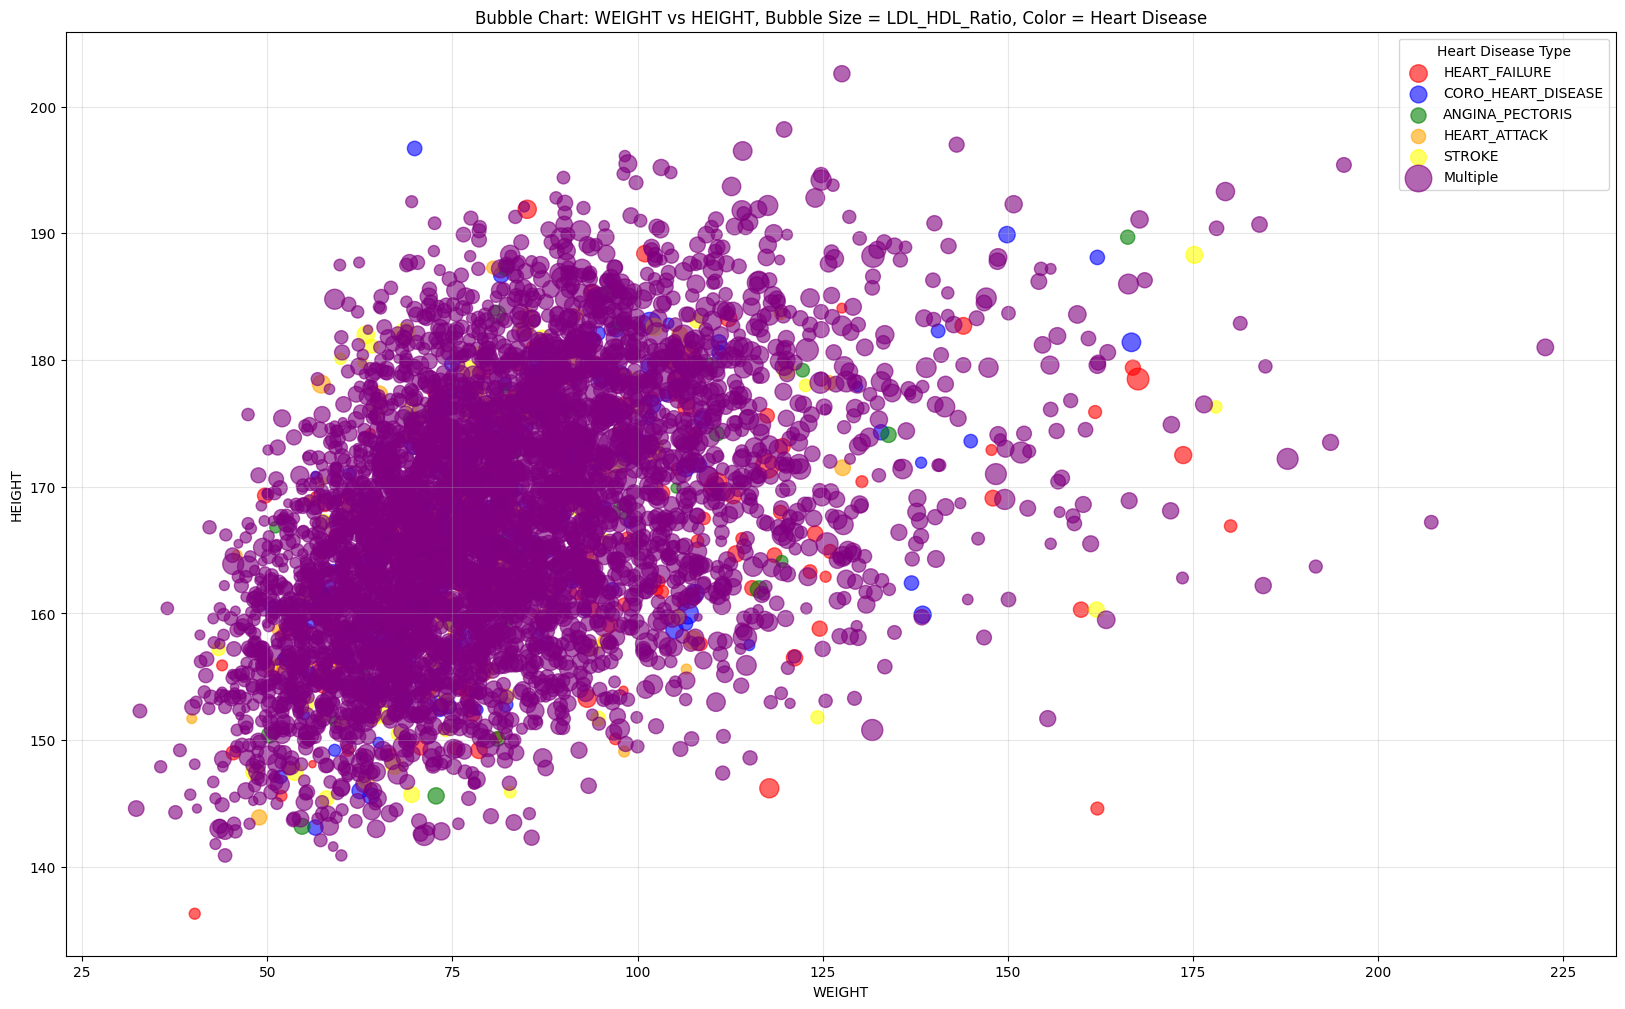

In [70]:
df_ratio = df.copy()
df_ratio['LDL_HDL_Ratio'] = df_ratio['LDL'] / df_ratio['HDL']

bubble_chart(df_ratio, size_col='LDL_HDL_Ratio', disease_cols=heart_condition_cols, size_multiplier=50)